# Salary prediction using linear regression

## Prerequisites: numpy, matplotlib, jupyter notebook

- pip install numpy
- pip install matplotlib
- pip install jupyter

## First, we import the needed libraries and load the dataset:

In [19]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from typing import Union

#Get dataset from csv
dataset: np.ndarray = genfromtxt('/home/istra/IA/DL/curs2/salary.csv', delimiter=',', skip_header=1)

#Get inputs from dataset
X: np.ndarray = dataset[:, 0]
X = X.reshape(X.shape[0], 1)

#get values from dataset
Y: np.ndarray = dataset[:, 1]

print(X, Y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]] [ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


## Let's plot the dataset and see how it looks:

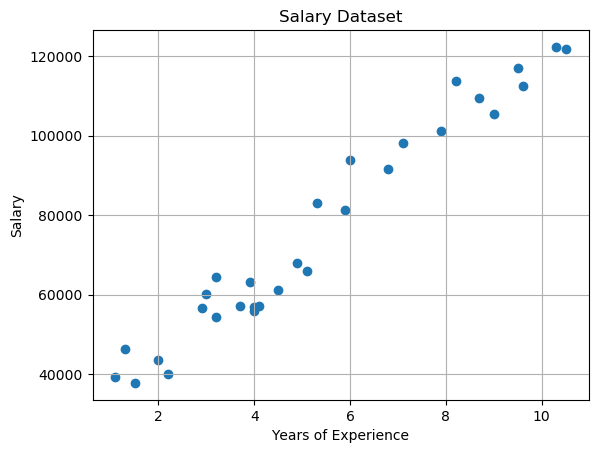

In [20]:
# use matplotlib
plt.scatter(X, Y)
plt.title('Salary Dataset')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid()
plt.show()

## Linear regression implies fitting a line that best approximates the points: $h(X) = Xw^T$

In [21]:
# define function h
def h(x_set: np.ndarray, weight_set: np.ndarray) -> Union[float, np.ndarray]:
    return x_set @ weight_set

## The true unknowns here are the parameters $w$. The easiest solution to the linear regression problem is given by the normal equation: $w^T = (X^T X)^{-1} X^T Y$

In [22]:
# define the normal_equation function
def get_weights_transposed(x_set: np.ndarray, y_set: np.ndarray) -> np.ndarray:
    return np.linalg.pinv(x_set) @ y_set

## The cost function is given by the RMS error: $J(w)=\frac{1}{2n}\sum_{i=1}^n (h(x^{(i)}) - y^{(i)})^2$

In [23]:
# define the cost function
def cost(x_set: np.ndarray, y_set: np.ndarray, weights: np.ndarray) -> Union[float, np.ndarray]:
    n = x_set.shape[0]
    y_hat = h(x_set, weights)
    return 1 / (2 * n) * np.sum(np.power(y_hat - y_set, 2))

## The bias $b$ needs to be also included. One trick that can be done is to append a column of ones to the dataset X:

In [24]:
def add_ones_column(x_set: np.ndarray) -> np.ndarray:
    return np.concatenate((np.ones([x_set.shape[0], 1]), x_set), axis=1)

x_norm_bias = add_ones_column(X) # append the bias column to the data
print(x_norm_bias)

[[ 1.   1.1]
 [ 1.   1.3]
 [ 1.   1.5]
 [ 1.   2. ]
 [ 1.   2.2]
 [ 1.   2.9]
 [ 1.   3. ]
 [ 1.   3.2]
 [ 1.   3.2]
 [ 1.   3.7]
 [ 1.   3.9]
 [ 1.   4. ]
 [ 1.   4. ]
 [ 1.   4.1]
 [ 1.   4.5]
 [ 1.   4.9]
 [ 1.   5.1]
 [ 1.   5.3]
 [ 1.   5.9]
 [ 1.   6. ]
 [ 1.   6.8]
 [ 1.   7.1]
 [ 1.   7.9]
 [ 1.   8.2]
 [ 1.   8.7]
 [ 1.   9. ]
 [ 1.   9.5]
 [ 1.   9.6]
 [ 1.  10.3]
 [ 1.  10.5]]


## Everything is in place now. Let's find the solution to the linear regression problem and print the cost function:

In [25]:
# Use the functions defined above to find the weights and compute cost
weights = get_weights_transposed(x_norm_bias, Y)
cost_current = cost(x_norm_bias, Y, weights)
# print the parameters and the resulted cost
print("Weights:", weights)
print("Cost:", cost_current)

Weights: [25792.20019867  9449.96232146]
Cost: 15635475.861140486


## Let's visualize the fitted line:

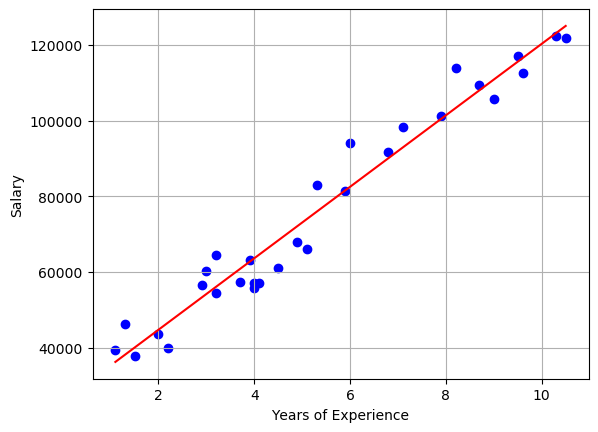

Cost: 15635475.861140486


In [26]:
# use matplotlib to visualize the data and the fitted line
plt.scatter(X, Y, color='blue', label='Data')
plt.plot(X, h(x_norm_bias, weights), color='red', label='Fitted line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid()
plt.show()
print("Cost:", cost_current)

## Let's predict your salary:

In [27]:
# use the results to make predictions on a new input
def predict(x_set: float) -> float:
    years_of_exp = np.ndarray([]).reshape(1, 1)
    years_of_exp[0, 0] = x_set
    years_of_exp = add_ones_column(years_of_exp)
    return h(years_of_exp, weights)[0]

print(predict(7.3))

94776.92514529076
